In [2]:
import pandas as pd

dataframe = pd.read_csv("./English_Dataset/english.csv")
label_map = {str(i): i for i in range(10)}
label_map.update({chr(65 + i): 10 + i for i in range(26)})  
label_map.update({chr(97 + i): 36 + i for i in range(26)})  

dataframe["label"] = dataframe["label"].map(label_map)

print(label_map)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, 'a': 36, 'b': 37, 'c': 38, 'd': 39, 'e': 40, 'f': 41, 'g': 42, 'h': 43, 'i': 44, 'j': 45, 'k': 46, 'l': 47, 'm': 48, 'n': 49, 'o': 50, 'p': 51, 'q': 52, 'r': 53, 's': 54, 't': 55, 'u': 56, 'v': 57, 'w': 58, 'x': 59, 'y': 60, 'z': 61}


In [56]:

# Group by the 'label' column
grouped = dataframe.groupby('label')

# Sample 10 images per label to create the test dataset
train_df = grouped.sample(n=45)

# Remove the sampled test data from the original dataframe to create the training set
test_df = dataframe.drop(train_df.index)

# Check the size of the resulting datasets
print("original size",len(dataframe))
print("Train set size:", len(train_df))
print("Test set size:", len(test_df))

# Save the train and test sets as new CSV files if needed
train_df.to_csv('./English_Dataset/train_dataset.csv', index=False) 
test_df.to_csv('./English_Dataset/test_dataset.csv', index=False)


original size 3410
Train set size: 2790
Test set size: 620


In [9]:
dataframe[dataframe["label"]]

KeyError: "None of [Index([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,\n       ...\n       61, 61, 61, 61, 61, 61, 61, 61, 61, 61],\n      dtype='int64', length=3410)] are in the [columns]"

In [7]:
import torch
import torch.utils
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import pandas as pd
import os
from torch.utils.data import DataLoader 

label_map = {str(i): i for i in range(10)}
label_map.update({chr(65 + i): 10 + i for i in range(26)})  
label_map.update({chr(97 + i): 36 + i for i in range(26)})  
print(label_map)
class CustomImageDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the CSV file with annotations (image paths and labels).
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample (image).
        """
        self.data_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.data_frame.iloc[idx, 0])
        image = Image.open(img_name)

        # Load the label (assuming the label is in the second column)
        label = self.data_frame.iloc[idx, 1]
        label = label_map[label]
        if self.transform:
            image = self.transform(image)
        # print(label)
        return image, torch.tensor(label, dtype=torch.long)

# Example of using the dataset
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((256, 256)),   # Resize all images to 256x256
    transforms.ToTensor(),           # Convert images to Tensor
    transforms.Normalize(mean=0.485, std=0.229)  # Normalize
])

# Create dataset instance
dataset = CustomImageDataset(csv_file="./English_Dataset/english.csv", root_dir="./English_Dataset", transform=transform)
gen1 = torch.Generator().manual_seed(42)

train_dataset,test_dataset = torch.utils.data.random_split(dataset,[0.7,0.3],gen1)


 # Use DataLoader to batch and shuffle data

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, 'a': 36, 'b': 37, 'c': 38, 'd': 39, 'e': 40, 'f': 41, 'g': 42, 'h': 43, 'i': 44, 'j': 45, 'k': 46, 'l': 47, 'm': 48, 'n': 49, 'o': 50, 'p': 51, 'q': 52, 'r': 53, 's': 54, 't': 55, 'u': 56, 'v': 57, 'w': 58, 'x': 59, 'y': 60, 'z': 61}


torch.Size([32, 1, 256, 256])
torch.Size([32])
torch.Size([32, 1, 256, 256])
torch.Size([32])
torch.Size([32, 1, 256, 256])
torch.Size([32])


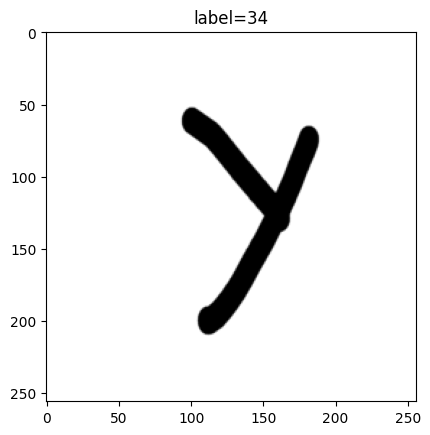

In [6]:
import matplotlib.pyplot as plt
num_epochs = 3

class Cnn(nn.Module):
    def __init__(self, hidden_size, num_classes):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.cnv1 = nn.Conv2d(in_channels=1,out_channels=10,kernel_size=(3,3),stride=1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2,2))
        self.cnv2 = nn.Conv2d(in_channels=10,out_channels=50,kernel_size=(3,3),stride=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2,2))
        
        self.fc1 = nn.Linear(50*5*5,hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self,x):
        x = self.cnv1(x)
        x = F.relu(x)
        x = self.maxpool1(x)
        
        x = self.cnv2(x)
        x = F.relu(x)
        x = self.maxpool2(x)
        ## Flattening the input x
        x = torch.flatten(x,1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x


for epoch in num_epochs:
    for idx, (image,label) in enumerate(train_dataloader):
        pass



for idx, (image, label) in enumerate(train_dataloader):
    # image = image.reshape(image.size(0),-1)
    plt.imshow(image[idx,0],cmap="gray")
    plt.title(f"label={label[idx]}")
    # print(image)
    print(image.shape)
    print(label.shape)
    if idx==2:
        break